In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
ka=pd.read_csv("data.csv")
print("Data imported ")
ka.head(10)

Data imported 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
ka.tail(6)

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


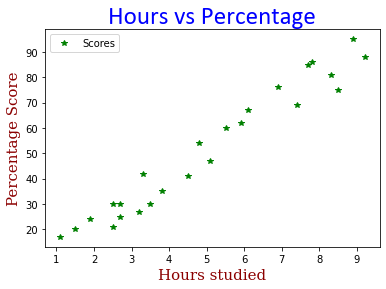

In [13]:
ka.plot(x='Hours', y='Scores',style='*',color='Green')
font1={'family':'calibri','color':'blue','size':25}
font2={'family':'serif','color':'darkred','size':15}
plt.title('Hours vs Percentage',fontdict=font1)
plt.xlabel('Hours studied',fontdict=font2)
plt.ylabel('Percentage Score',fontdict=font2)
plt.show()

In [18]:
ka.shape

(25, 2)

In [15]:
ka.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
ka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
ka.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [21]:
ka.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [25]:
x=(ka['Hours'].values).reshape(-1,1)
y=ka['Scores'].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('splitting is done')

splitting is done


In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Algorithm Trained")

Algorithm Trained


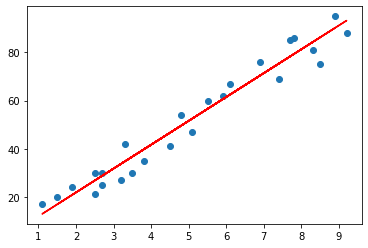

In [41]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line,color='Red');
plt.show()

In [44]:
print(x_test) # Testing data In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [45]:
kd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
kd

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [47]:
from sklearn import metrics
print('Mean absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean absolute Error: 4.183859899002975
